In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_excel('/home/leleo/BD_SP_DEFICIT.xlsx')
data.head()

,AREA_POND,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,...,Soma_V206,Soma_V207,Soma_soma_V202eV203,Soma_soma_V204eV205,Soma_soma_V206eV207,DOMICILIOS_PRECARIOS,COABITACAO,ONUS_EXCESSIVO,ADENSAMENTO,DEFICIT_TOTAL
0,3500105003001,35,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,Municípios não pertencentes a estrutura de RM,3500105,...,0,0,3991,17,0,0,164,210,20,394
1,3500105003002,35,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,Municípios não pertencentes a estrutura de RM,3500105,...,0,0,6487,99,0,53,403,226,23,705
2,3500204001001,35,São Paulo,3501,São José do Rio Preto,35004,São José do Rio Preto,0,Municípios não pertencentes a estrutura de RM,3500204,...,0,0,1044,37,0,0,67,40,6,112
3,3500303003001,35,São Paulo,3507,Campinas,35029,Pirassununga,0,Municípios não pertencentes a estrutura de RM,3500303,...,2,2,8644,127,4,34,637,524,104,1300
4,3500402001001,35,São Paulo,3507,Campinas,35030,São João da Boa Vista,0,Municípios não pertencentes a estrutura de RM,3500402,...,0,10,2042,202,10,8,124,96,17,246


In [80]:
# Selecting features and target variable
X = data.iloc[:, 11:-5]
Y = data.iloc[:, -1]

In [81]:
Y

0       0.070090
1       0.126126
2       0.019279
3       0.233333
4       0.043423
          ...   
1873    0.150811
1874    0.137117
1875    0.008649
1876    0.074414
1877    0.069369
Name: DEFICIT_TOTAL, Length: 1878, dtype: float64

In [79]:
from sklearn.preprocessing import MinMaxScaler

## VERIFICAR A NECESSIDADE DA APLICAÇÃO DO StandardScaler (Standardization)!!

# MinMaxScaler

cols_to_normalize = data.columns[11:]

scaler_norm = MinMaxScaler()
data[cols_to_normalize] = scaler_norm.fit_transform(data[cols_to_normalize])

data.head()

,AREA_POND,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,...,Soma_V206,Soma_V207,Soma_soma_V202eV203,Soma_soma_V204eV205,Soma_soma_V206eV207,DOMICILIOS_PRECARIOS,COABITACAO,ONUS_EXCESSIVO,ADENSAMENTO,DEFICIT_TOTAL
0,3500105003001,35,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,Municípios não pertencentes a estrutura de RM,3500105,...,0.000000,0.000000,0.095581,0.002515,0.000000,0.000000,0.047605,0.119318,0.033727,0.070090
1,3500105003002,35,São Paulo,3508,Presidente Prudente,35035,Adamantina,0,Municípios não pertencentes a estrutura de RM,3500105,...,0.000000,0.000000,0.156424,0.014647,0.000000,0.029041,0.116981,0.128409,0.038786,0.126126
2,3500204001001,35,São Paulo,3501,São José do Rio Preto,35004,São José do Rio Preto,0,Municípios não pertencentes a estrutura de RM,3500204,...,0.000000,0.000000,0.023743,0.005474,0.000000,0.000000,0.019448,0.022727,0.010118,0.019279
3,3500303003001,35,São Paulo,3507,Campinas,35029,Pirassununga,0,Municípios não pertencentes a estrutura de RM,3500303,...,0.029412,0.016393,0.209005,0.018790,0.024845,0.018630,0.184906,0.297727,0.175379,0.233333
4,3500402001001,35,São Paulo,3507,Campinas,35030,São João da Boa Vista,0,Municípios não pertencentes a estrutura de RM,3500402,...,0.000000,0.081967,0.048071,0.029886,0.062112,0.004384,0.035994,0.054545,0.028668,0.043423


In [114]:
from sklearn.model_selection import KFold
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Criação dos modelos usados
# etr = ExtraTreesRegressor(n_estimators=100, random_state=42)

# scoring = {
#     'r2': 'r2',
#     'rmse': 'neg_mean_squared_error',
#     'mae': 'neg_mean_absolute_error'
# }
# scores = cross_validate(etr, X, Y, scoring=scoring,
#                          cv=5, return_train_score=True, verbose=8)

In [118]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, Y), 1):
    print(f"\nFold {fold}:")

    # Dividir os dados em treino e teste para este fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    etr = ExtraTreeRegressor(random_state=42)

    etr.fit(X_train, y_train)
    y_pred = etr.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print('R-Squared:', r2)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)


Fold 1:
R-Squared: 0.905657116607822
Root Mean Squared Error: 0.03593938183220504
Mean Absolute Error: 0.024649702894383747

Fold 2:
R-Squared: 0.8378437687404761
Root Mean Squared Error: 0.04632532692983504
Mean Absolute Error: 0.02982269503546099

Fold 3:
R-Squared: 0.8819300006863937
Root Mean Squared Error: 0.036115969427166085
Mean Absolute Error: 0.02373011309181522

Fold 4:
R-Squared: 0.8422862563429786
Root Mean Squared Error: 0.042074820340946666
Mean Absolute Error: 0.02614918918918919

Fold 5:
R-Squared: 0.8609570227665497
Root Mean Squared Error: 0.04068256204614481
Mean Absolute Error: 0.027199039039039044


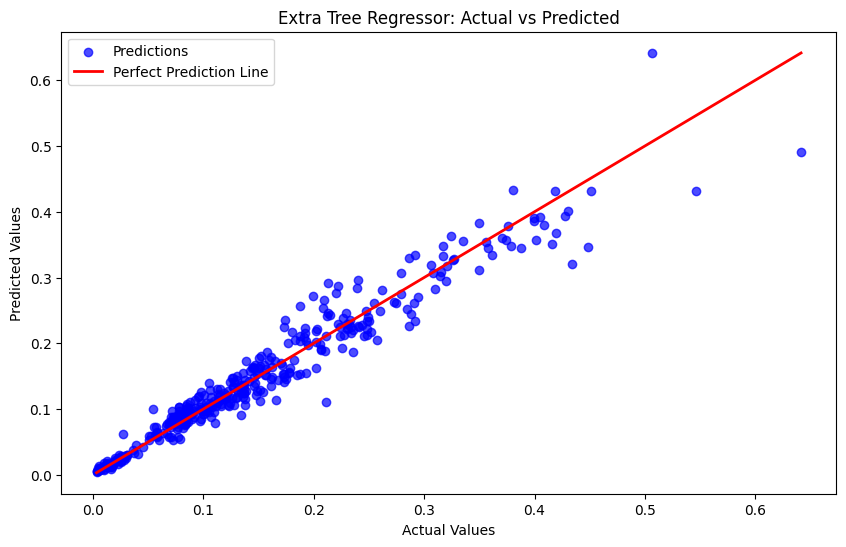

In [108]:
# Plotting actual vs predicted values for test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction Line')
plt.title('Extra Tree Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

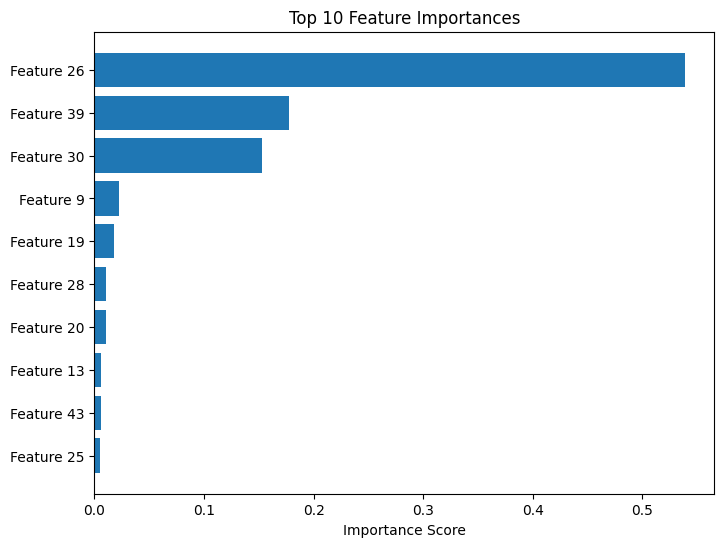

In [100]:
# Compute feature importances
importances = etr.feature_importances_
indices = np.argsort(importances)[-10:]  # Select top 10 indices

# Sort indices by importance in descending order
sorted_indices = indices[np.argsort(importances[indices])]

plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(10), importances[sorted_indices], align="center")
plt.yticks(range(10), np.array([f'Feature {i}' for i in sorted_indices]))
plt.xlabel("Importance Score")
plt.show()

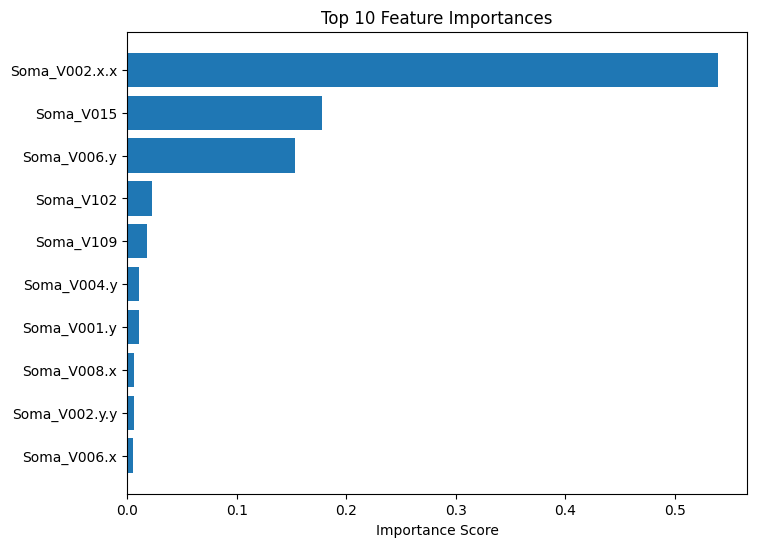

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Compute feature importances
importances = etr.feature_importances_
feature_names = X.columns  # Get actual feature names if X is a Pandas DataFrame

# Get indices of top 10 most important features
indices = np.argsort(importances)[-10:]

# Sort indices by importance in descending order
sorted_indices = indices[np.argsort(importances[indices])]

# Plot the top 10 features
plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(10), importances[sorted_indices], align="center")
plt.yticks(range(10), feature_names[sorted_indices])  # Use actual feature names
plt.xlabel("Importance Score")
plt.show()


In [120]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, Y), 1):
    print(f"\nFold {fold}:")

    # Dividir os dados em treino e teste para este fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    etsr = ExtraTreesRegressor(n_estimators=100, random_state=42)

    etsr.fit(X_train, y_train)
    y_pred = etsr.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print('R-Squared:', r2)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)


Fold 1:
R-Squared: 0.9549185842783321
Root Mean Squared Error: 0.024843615730114517
Mean Absolute Error: 0.017387301130918152

Fold 2:
R-Squared: 0.9256590561167879
Root Mean Squared Error: 0.031366474447571575
Mean Absolute Error: 0.01819698581560283

Fold 3:
R-Squared: 0.9401826379926034
Root Mean Squared Error: 0.02570651030466985
Mean Absolute Error: 0.01730809852405597

Fold 4:
R-Squared: 0.9374856023105498
Root Mean Squared Error: 0.0264897296186118
Mean Absolute Error: 0.016134952552552553

Fold 5:
R-Squared: 0.9437267841265434
Root Mean Squared Error: 0.02588121339417574
Mean Absolute Error: 0.01667943783783783


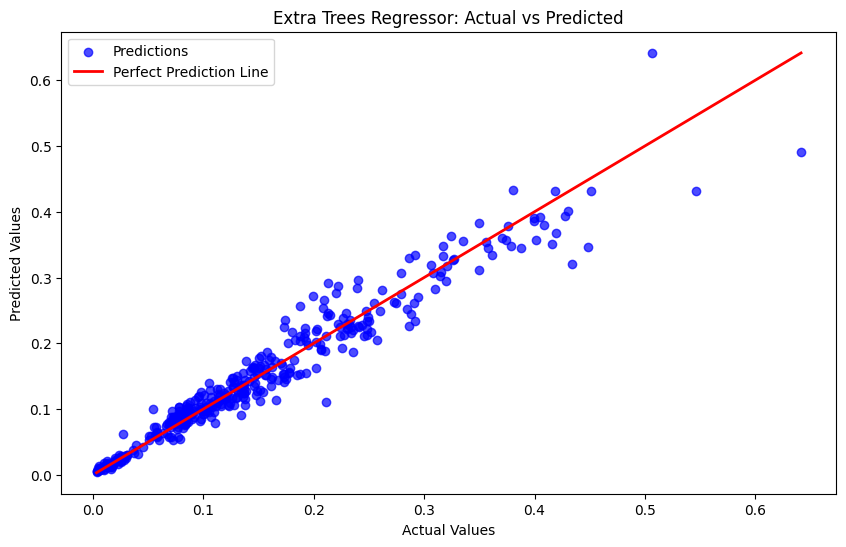

In [105]:
# Plotting actual vs predicted values for test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction Line')
plt.title('Extra Trees Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

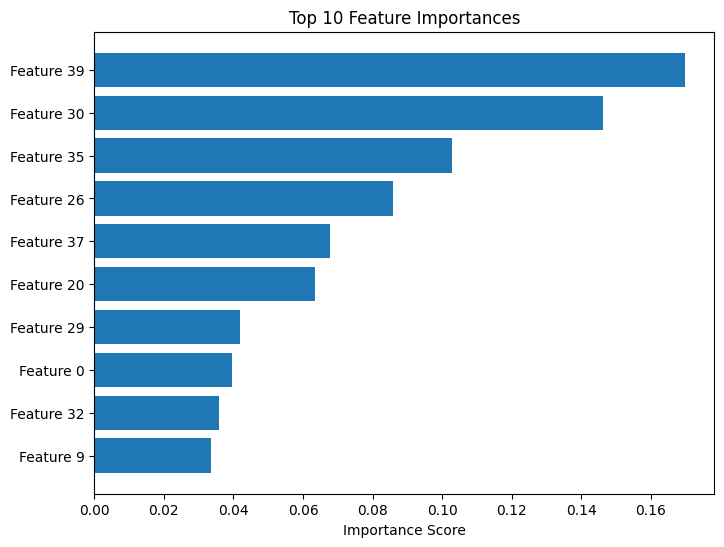

In [107]:
# Compute feature importances
importances = etsr.feature_importances_
indices = np.argsort(importances)[-10:]  # Select top 10 indices

# Sort indices by importance in descending order
sorted_indices = indices[np.argsort(importances[indices])]

plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(10), importances[sorted_indices], align="center")
plt.yticks(range(10), np.array([f'Feature {i}' for i in sorted_indices]))
plt.xlabel("Importance Score")
plt.show()

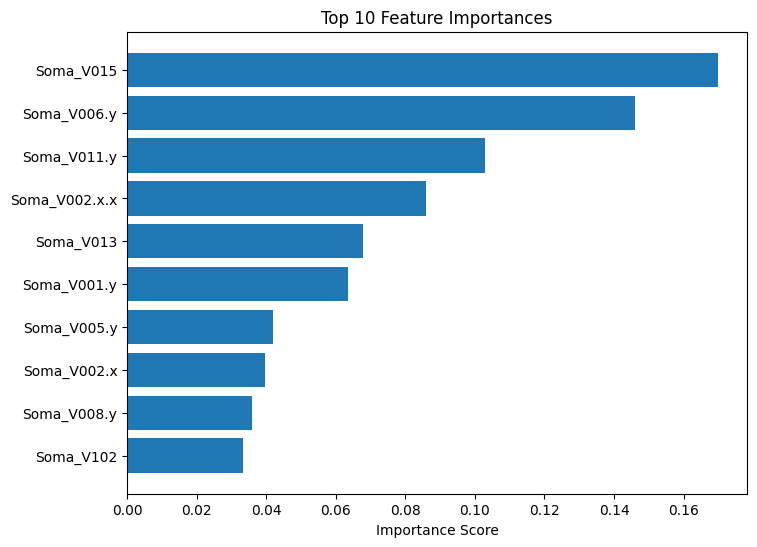

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Compute feature importances
importances = etsr.feature_importances_
feature_names = X.columns  # Get actual feature names if X is a Pandas DataFrame

# Get indices of top 10 most important features
indices = np.argsort(importances)[-10:]

# Sort indices by importance in descending order
sorted_indices = indices[np.argsort(importances[indices])]

# Plot the top 10 features
plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(10), importances[sorted_indices], align="center")
plt.yticks(range(10), feature_names[sorted_indices])  # Use actual feature names
plt.xlabel("Importance Score")
plt.show()
